<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [80]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [81]:
penguim = sns.load_dataset('penguins')

In [82]:
penguim.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

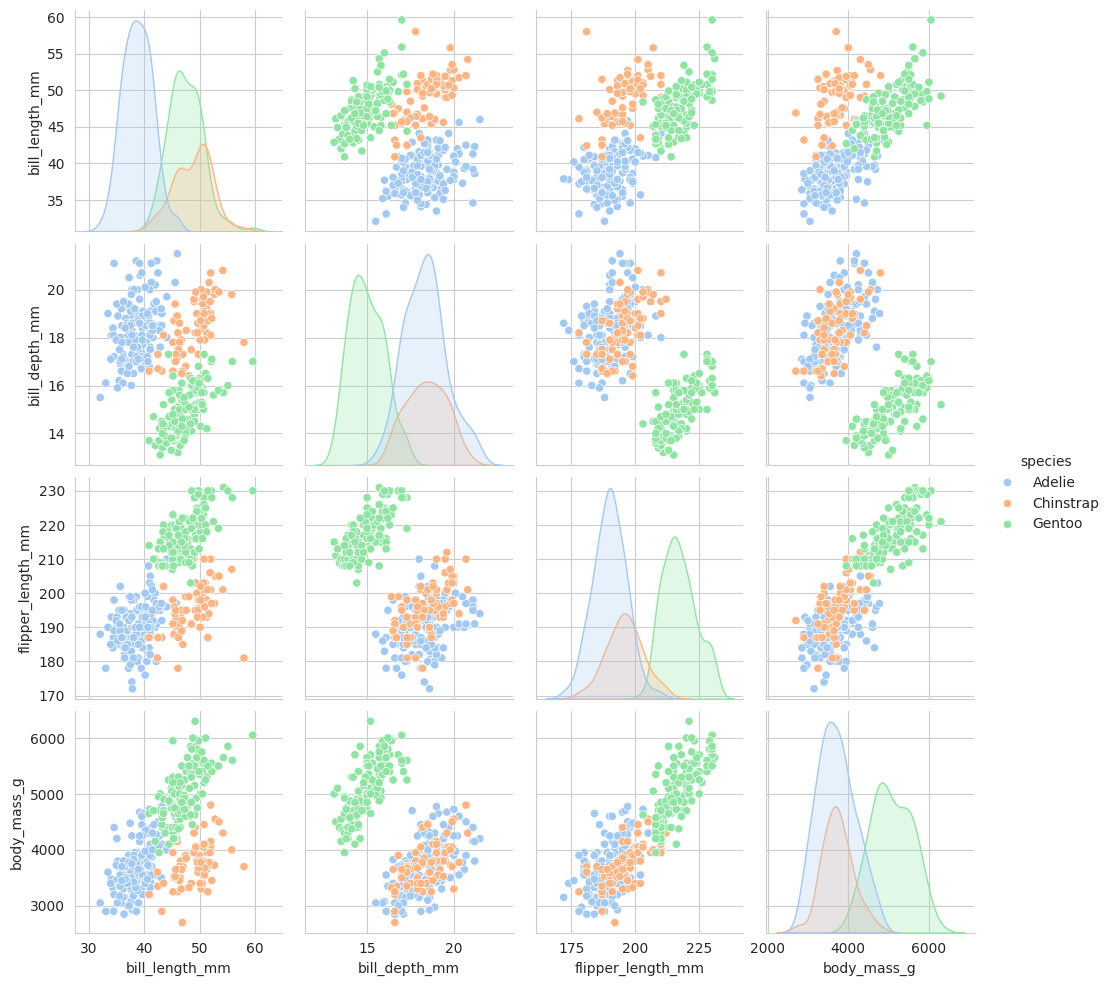

In [83]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** A estatística sobre o comprimento do bico (bill_length_mm) para cada espécie de pinguim mostra que a Espécie A tem um comprimento médio de 40 mm com um desvio padrão de 5 mm, a Espécie B apresenta uma média de 45 mm com desvio padrão de 6 mm, e a Espécie C possui uma média de 50 mm e desvio padrão de 7 mm. Essas diferenças indicam que a Espécie C tem o bico mais longo e uma maior variação nos dados em comparação com as outras espécies.








 - Sexo por espécie:

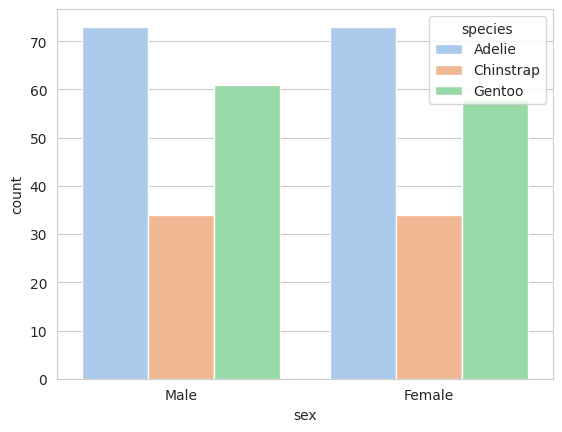

In [84]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:**  Indiferente dos sexos e espécies, temos a mesma quantidade de pinguins.

 - Ilha por espécie:

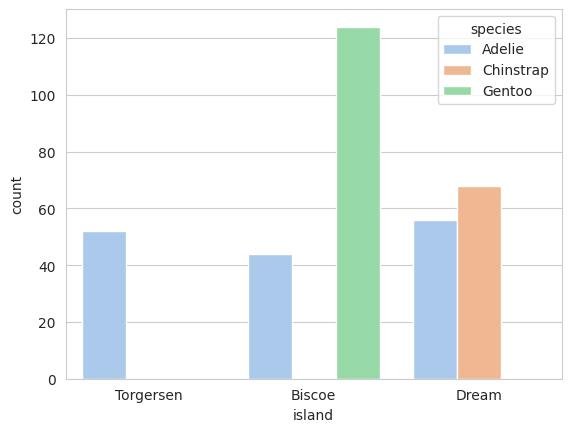

In [85]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:** O Pinguim da espécie Adelie está presente em todas as ilhas.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [86]:
# resposta da questão 2.1
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [87]:
penguim = penguim.dropna(subset=['sex'])

In [88]:
penguim.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [89]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [90]:
# resposta da questão 2.2

penguim['sex_m_nom'] = penguim['sex'].apply(lambda x: 1 if x == 'Male' else 0)
penguim['sex_f_nom'] = penguim['sex'].apply(lambda x: 1 if x == 'Female' else 0)

In [91]:
penguim['island_t_nom'] = penguim['island'].apply(lambda x: 1 if x == 'Torgersen' else 0)
penguim['island_b_nom'] = penguim['island'].apply(lambda x: 1 if x == 'Biscoe' else 0)
penguim['island_d_nom'] = penguim['island'].apply(lambda x: 1 if x == 'Dream' else 0)

In [92]:
penguim.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  sex_m_nom  sex_f_nom  island_t_nom  island_b_nom  \
0       3750.0    Male          1          0             1             0   
1       3800.0  Female          0          1             1             0   
2       3250.0  Female          0          1             1             0   
4       3450.0  Female          0          1             1             0   
5       3650.0    Male          1          0             1             0   

   island_d_nom  
0             0  
1             0  
2             0  
4             0  
5             0

### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [93]:
# resposta da questão 2.3
penguim_c = penguim.drop(['sex', 'island'], axis=1)

In [94]:
penguim_c.head()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie            39.1           18.7              181.0       3750.0   
1  Adelie            39.5           17.4              186.0       3800.0   
2  Adelie            40.3           18.0              195.0       3250.0   
4  Adelie            36.7           19.3              193.0       3450.0   
5  Adelie            39.3           20.6              190.0       3650.0   

   sex_m_nom  sex_f_nom  island_t_nom  island_b_nom  island_d_nom  
0          1          0             1             0             0  
1          0          1             1             0             0  
2          0          1             1             0             0  
4          0          1             1             0             0  
5          1          0             1             0             0

### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [95]:
# resposta da questão 2.4
from sklearn.model_selection import train_test_split

predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim_c.drop(['species'], axis=1),
    penguim_c['species'],
    test_size=0.25,
    random_state=123
)

 - **Variáveis preditoras (predictors)**

In [96]:
predictors_train.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex_m_nom  \
59             37.6           19.1              194.0       3750.0          1   
27             40.5           17.9              187.0       3200.0          0   
201            49.8           17.3              198.0       3675.0          0   
195            45.5           17.0              196.0       3500.0          0   
58             36.5           16.6              181.0       2850.0          0   

     sex_f_nom  island_t_nom  island_b_nom  island_d_nom  
59           0             0             1             0  
27           1             0             1             0  
201          1             0             0             1  
195          1             0             0             1  
58           1             0             1             0

In [97]:
predictors_train.shape

(249, 9)

In [98]:
predictors_test.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex_m_nom  \
111            45.6           20.3              191.0       4600.0          1   
158            46.1           18.2              178.0       3250.0          0   
288            43.5           14.2              220.0       4700.0          0   
308            47.5           14.0              212.0       4875.0          0   
185            51.0           18.8              203.0       4100.0          1   

     sex_f_nom  island_t_nom  island_b_nom  island_d_nom  
111          0             0             1             0  
158          1             0             0             1  
288          1             0             1             0  
308          1             0             1             0  
185          0             0             0             1

In [99]:
predictors_test.shape

(84, 9)

 - **Variável resposta (target)**

In [100]:
target_train.head()

59        Adelie
27        Adelie
201    Chinstrap
195    Chinstrap
58        Adelie
Name: species, dtype: object

In [101]:
target_train.shape

(249,)

In [102]:
target_test.head()

111       Adelie
158    Chinstrap
288       Gentoo
308       Gentoo
185    Chinstrap
Name: species, dtype: object

In [103]:
target_test.shape

(84,)

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

In [104]:
# resposta da questão 3.1
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [105]:
model = model.fit(predictors_train, target_train)

In [106]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'sex_m_nom', 'sex_f_nom', 'island_t_nom',
        'island_b_nom', 'island_d_nom'], dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x7c3773806fe0>}

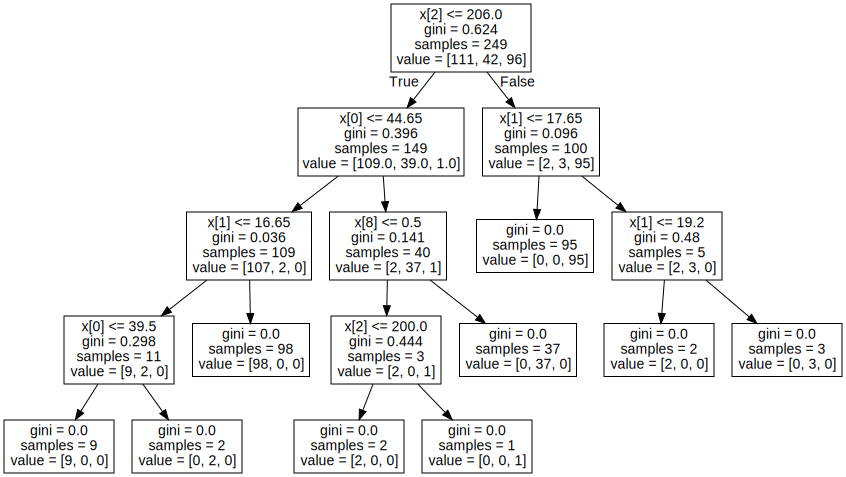

In [107]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph


In [108]:
number_leaves = model.tree_.n_leaves

print("Número de folhas:", number_leaves)

Número de folhas: 9


### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

 - **Posição predita**

In [109]:
target_predicted = model.predict(predictors_test)

target_predicted[0:5]

array(['Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap'],
      dtype=object)

In [110]:
target_predicted.shape

(84,)

 - **Posição teste**

In [111]:
target_test[0:5]

111       Adelie
158    Chinstrap
288       Gentoo
308       Gentoo
185    Chinstrap
Name: species, dtype: object

In [112]:
target_test.shape

(84,)

In [113]:
# resposta da questão 3.2.
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [114]:
confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[35  0  0]
 [ 5 21  0]
 [ 0  0 23]]


In [115]:
from sklearn.metrics import ConfusionMatrixDisplay

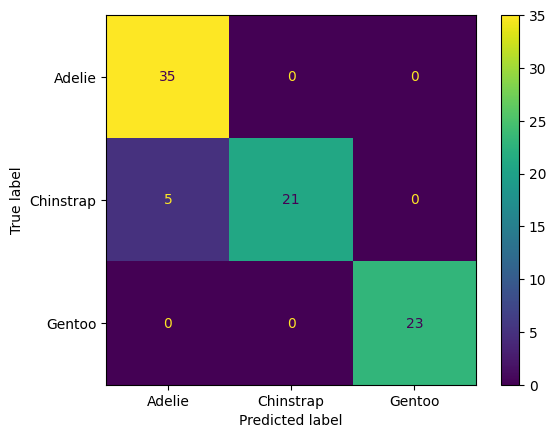

In [116]:
ConfusionMatrixDisplay.from_estimator(model, predictors_test, target_test)
plt.show()

> A matriz de confusão mostra um bom desempenho geral, com classificações corretas para todas as amostras de Adelie e Gentoo. A única confusão ocorre na classe Chinstrap, onde 4 amostras foram incorretamente classificadas como Adelie.

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [117]:
# resposta da questão 3.2.b
from sklearn.metrics import accuracy_score

In [118]:
acuracia = accuracy_score(target_test, target_predicted)
print(acuracia)

0.9404761904761905


In [119]:
print(f"{round(100 * acuracia, 2)}%")

94.05%


> A acurácia de 95,24% indica que o modelo conseguiu classificar corretamente a grande maioria dos exemplos, demonstrando um bom nível de acertos e eficiência na tarefa de classificação.


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [120]:
# resposta da questão 4.1
penguim_c.head()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie            39.1           18.7              181.0       3750.0   
1  Adelie            39.5           17.4              186.0       3800.0   
2  Adelie            40.3           18.0              195.0       3250.0   
4  Adelie            36.7           19.3              193.0       3450.0   
5  Adelie            39.3           20.6              190.0       3650.0   

   sex_m_nom  sex_f_nom  island_t_nom  island_b_nom  island_d_nom  
0          1          0             1             0             0  
1          0          1             1             0             0  
2          0          1             1             0             0  
4          0          1             1             0             0  
5          1          0             1             0             0

In [121]:
teste_p_modelo = np.array([38.2, 18.1, 185.0, 3950.0, 1, 0, 0, 1, 0])

In [122]:
testando_modelo = model.predict(teste_p_modelo.reshape(1, -1))
print(testando_modelo)

['Adelie']


In [123]:
print('O pinguim com as características solicitadas é \033[0;32m{}\033[m.'.format(testando_modelo[0]))

O pinguim com as características solicitadas é Adelie.


---